In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Id, Is, Vd, Vj, Rs, Vt = sp.symbols('Id Is Vd Vj Rs Vt', real=True)

diode_eq = sp.Eq(Id, Is*(sp.exp(Vj/Vt) - 1))
current_eq = sp.Eq(Id, (Vd - Vj)/Rs)

display(diode_eq)
display(current_eq)

ideal_diode_sol = sp.solve(diode_eq, Id)[0]
sol = sp.solve([diode_eq, current_eq], [Id, Vj], dict=True)[0]

Eq(Id, Is*(exp(Vj/Vt) - 1))

Eq(Id, (Vd - Vj)/Rs)

In [2]:
for k, v in sol.items():
    sol[k] = v.simplify()
    display(sp.Eq(k, sol[k]))

display(ideal_diode_sol)

Eq(Id, (-Is*Rs + Vt*LambertW(Is*Rs*exp((Is*Rs + Vd)/Vt)/Vt))/Rs)

Eq(Vj, Is*Rs + Vd - Vt*LambertW(Is*Rs*exp((Is*Rs + Vd)/Vt)/Vt))

Is*(exp(Vj/Vt) - 1)

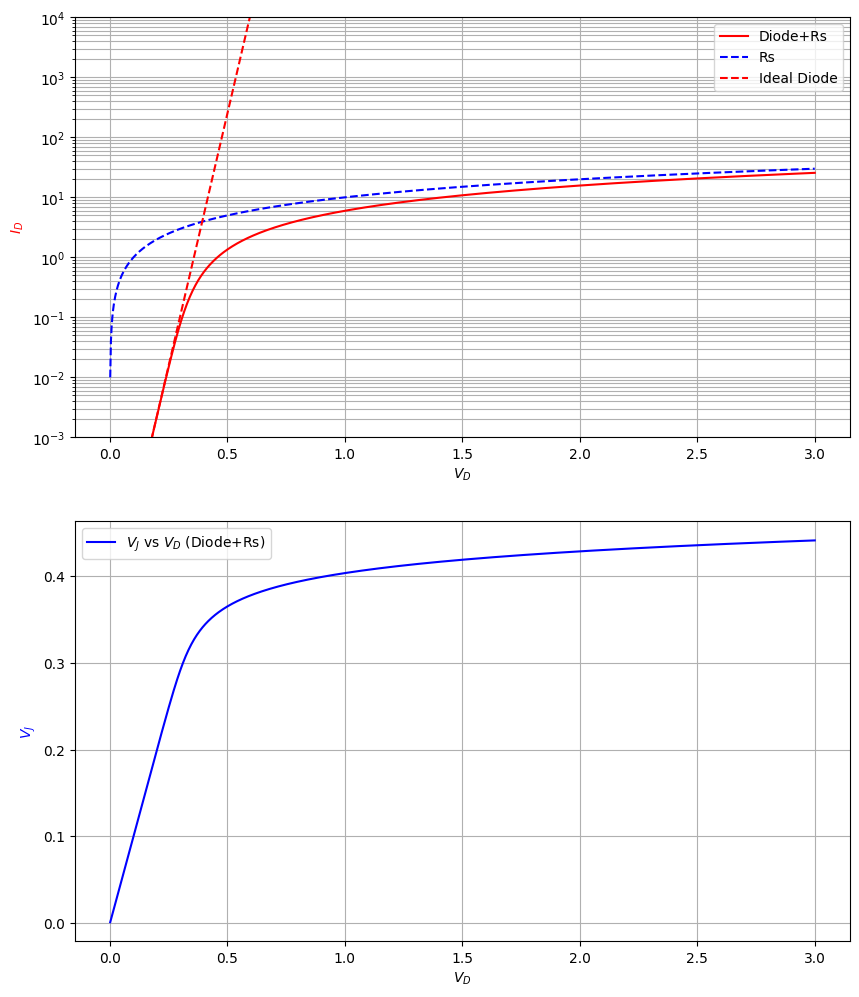

In [10]:
sol_Id = sol[Id]
sol_Vj = sol[Vj]


k = 1.38064852e-23  # define boltzmann constant
T = 300             # define temperature (K)
q = 1.60217662e-19  # define q (charge of electron)

const = {
    Vt: k*T/q,
    # A
    Is: 1e-6,
    # ohm
    Rs: 0.1    ,
}

from scipy.special import lambertw as LambertW

# lambdify the functions
def custom_lambdify(x, expr):
    return sp.lambdify(x, expr, modules=[{'LambertW': LambertW, 'exp': np.exp, 'log': np.log}, 'numpy'])

f_Id = custom_lambdify(Vd, sol_Id.subs(const))
f_Vj = custom_lambdify(Vd, sol_Vj.subs(const))
f_Id_ideal = custom_lambdify(Vj, ideal_diode_sol.subs(const))

# create a range of voltages
v = np.linspace(1e-3, 3, 1000)

# plt.figure(figsize=(10, 10))
# create two different y-axes
fig, axs = plt.subplots(2, 1, figsize=(10, 12))
ax1, ax2 = axs

# plot the current
Id_vs_Vd        = np.abs(f_Id(v))
Irs_vs_Vd       = np.abs(v/const[Rs])
Vj_vs_Vd        = np.abs(f_Vj(v))
Iideal_vs_Vj    = np.abs(f_Id_ideal(v))

ax1.semilogy(v, Id_vs_Vd, 'r', linestyle='-', label='Diode+Rs')
ax1.semilogy(v, Irs_vs_Vd, 'b', linestyle='--', label='Rs')
ax1.semilogy(v, Iideal_vs_Vj, 'r', linestyle='--', label='Ideal Diode')
ax1.set_ylabel('$I_D$', color='r')
ax1.set_xlabel('$V_D$')
ax1.grid(which='both')
ax1.set_ylim(1e-3, 1e4)
ax1.legend()

# plot the diode junction voltage
ax2.plot(v, Vj_vs_Vd, 'b', linestyle='-', label='$V_J$ vs $V_D$ (Diode+Rs)')
ax2.set_ylabel('$V_J$', color='b')
ax2.set_xlabel('$V_D$')
ax2.legend()
ax2.grid()


plt.show()